-----------------------------------------------------------------------------
      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0            

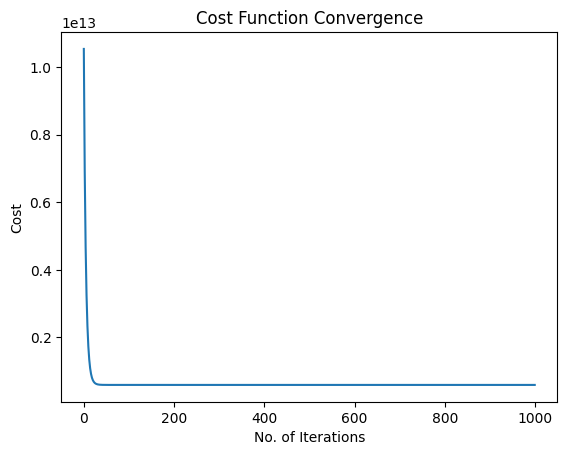

-----------------------------------------------------------------------------------------------------------------------
Parameter Values for learning rate 0.0001: [454946.78425116  86545.31552154  60805.15578033  81606.70065346
  69469.18034483  50343.00307011  36575.90716047  28134.31321143
  14856.97105731  73273.27901742  64814.31601523  57144.441497
  15599.44929971 -48810.65839857]
Parameter Values for learning rate 0.001: [3022732.87955595  400846.43508968  204665.31744721  367100.26167224
  310662.33826747  204826.10479659  131839.84870967  107886.5680432
  107917.04219985  337859.77102955  265858.7121093   245062.38796844
   34450.76008897 -181722.36108305]
Parameter Values for learning rate 0.01: [4780294.62899172  519764.07182607   84484.1931098   463426.61379083
  400093.95831418  189142.6294567    93718.22759093  140749.19758092
  195964.58062682  414382.04189207  252405.24520734  278879.87694583
   13130.03707456 -182677.2694536 ]
Parameter Values for learning rate 0.1: [4

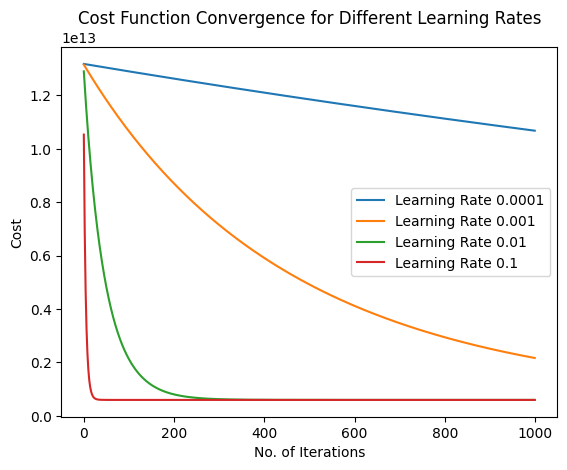

-----------------------------------------------------------------------------


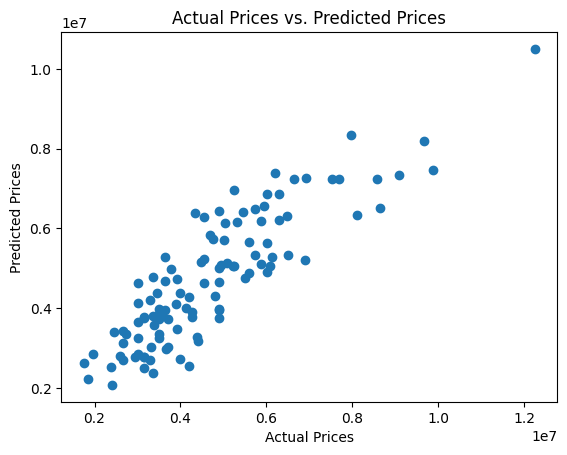

-----------------------------------------------------------------------------


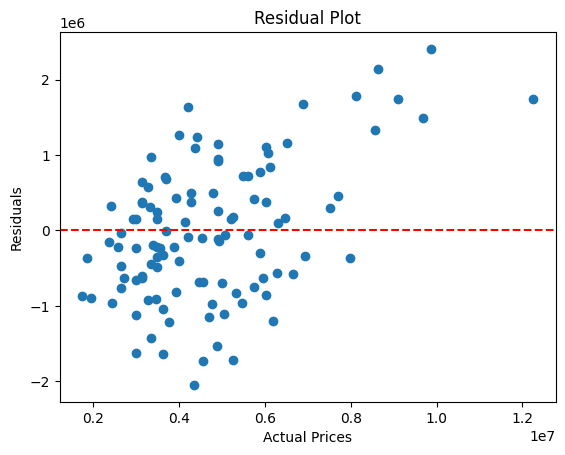

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('Housing.csv')

df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

print("-----------------------------------------------------------------------------")
print(df.head())
print("-----------------------------------------------------------------------------")
print(df.describe())

X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("-----------------------------------------------------------------------------")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("-----------------------------------------------------------------------------")
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

print("-----------------------------------------------------------------------------")
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    squared_error = (predictions - y) ** 2
    cost = 1 / (2 * m) * np.sum(squared_error)
    return cost

def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = []
    prev_cost = float('inf')
    for i in range(num_iterations):
        gradient = (1 / m) * (X.T.dot(X.dot(theta) - y))
        theta = theta - learning_rate * gradient.astype('float64')
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
        prev_cost = cost

    return theta, cost_history

X_train = np.column_stack((np.ones(len(X_train)), X_train))
theta = np.random.rand(X_train.shape[1])

learning_rate = 0.1
num_iterations = 1000

theta, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, num_iterations)
print("-----------------------------------------------------------------------------------------")
print("Paramter Values:", theta)

print("-----------------------------------------------------------------------------------------")
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("No. of Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.show()

learning_rates = [0.0001, 0.001, 0.01, 0.1]
cost_histories = {}
learned_coefficients = {}

for lr in learning_rates:
    theta = np.random.rand(X_train.shape[1])
    theta, cost_history = gradient_descent(X_train, y_train, theta, lr, num_iterations)
    cost_histories[lr] = cost_history
    learned_coefficients[lr] = theta

print("-----------------------------------------------------------------------------------------------------------------------")
for lr, coefficients in learned_coefficients.items():
    print(f"Parameter Values for learning rate {lr}:", coefficients)

for lr, costs in cost_histories.items():
    plt.plot(range(len(costs)), costs, label=f"Learning Rate {lr}")

print("-----------------------------------------------------------------------------------------------------------------------")
plt.xlabel("No. of Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence for Different Learning Rates")
plt.legend()
plt.show()
